# UPLOADING THE DATASET


In [4]:
import pandas as pd
github_links = {
    "blinkit_orders.csv": "https://raw.githubusercontent.com/AdityaAryan5/DAI-101_Assignment01/main/blinkit_orders.csv",
    "blinkit_order_items.csv": "https://raw.githubusercontent.com/AdityaAryan5/DAI-101_Assignment01/main/blinkit_order_items.csv",
}

dataframes = {}
for file, url in github_links.items():
    try:
        dataframes[file] = pd.read_csv(url)
        print(f"Loaded: {file}")
    except Exception as e:
        print(f"Error loading {file}: {e}")

print("LOCK AND LOADED.")

Loaded: blinkit_orders.csv
Loaded: blinkit_order_items.csv
LOCK AND LOADED.


# FOR UNIVARIATE **ANALYSIS**

# STATS

# Summary Statistics for Orders

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


orders = dataframes["blinkit_orders.csv"]
order_items = dataframes["blinkit_order_items.csv"]

print("\n Summary Statistics for Orders:")
display(orders.describe())







 Summary Statistics for Orders:


,order_id,customer_id,order_total,delivery_partner_id,store_id
count,5.000000e+03,5.000000e+03,5000.00000,5000.000000,5000.000000
mean,5.029129e+09,5.009685e+07,2201.86170,50050.318200,4999.689000
std,2.863533e+09,2.919082e+07,1303.02438,28802.276922,2886.089242
min,6.046500e+04,3.181300e+04,13.25000,43.000000,1.000000
25%,2.531421e+09,2.404314e+07,1086.21500,24928.500000,2509.250000
50%,5.074378e+09,4.997808e+07,2100.69000,50262.500000,4987.000000
75%,7.488579e+09,7.621215e+07,3156.88250,74478.250000,7500.750000
max,9.998298e+09,9.989390e+07,6721.46000,99968.000000,9995.000000


# Summary Statistics for Order Items

In [13]:
print("\n Summary Statistics for Order Items:")
display(order_items.describe())



 Summary Statistics for Order Items:


,order_id,product_id,quantity,unit_price
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,5.029129e+09,509974.939600,2.006800,493.157900
std,2.863533e+09,293678.307475,0.820542,298.075647
min,6.046500e+04,4452.000000,1.000000,12.320000
25%,2.531421e+09,257719.000000,1.000000,227.220000
50%,5.074378e+09,540618.000000,2.000000,448.160000
75%,7.488579e+09,747801.000000,3.000000,781.080000
max,9.998298e+09,993331.000000,3.000000,995.980000


# Categorical Summary for Orders

In [14]:
print("\n Categorical Summary for Orders:")
display(orders.describe(include=["object"]))



 Categorical Summary for Orders:


,order_date,promised_delivery_time,actual_delivery_time,delivery_status,payment_method
count,5000,5000,5000,5000,5000
unique,5000,4999,5000,3,4
top,2024-07-17 08:34:01,2024-10-13 14:06:50,2024-07-17 08:47:01,On Time,Card
freq,1,2,1,3470,1285


# HISTOGRAM

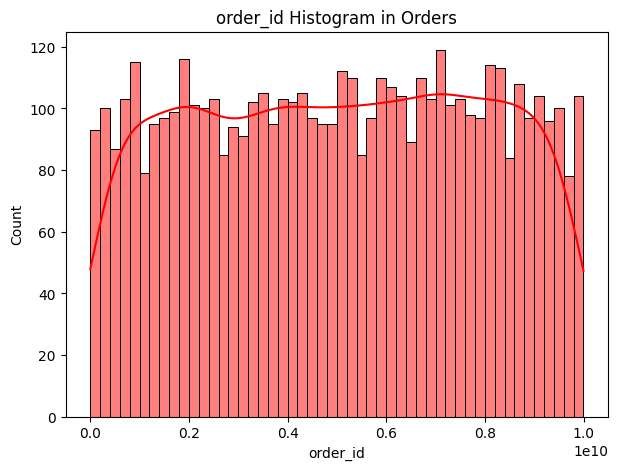

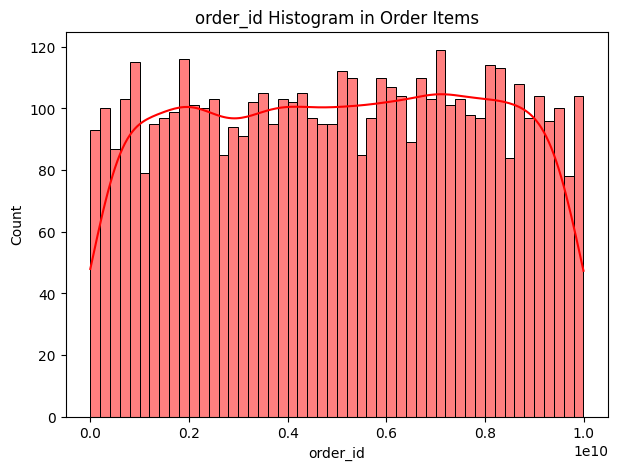

In [12]:


dataset = {"Orders": orders, "Order Items": order_items}

for name, df in dataset.items():
    num_cols = df.select_dtypes(include=['number']).columns
    if len(num_cols) > 0:
        col = num_cols[0]


        plt.figure(figsize=(7, 5))
        sns.histplot(df[col].dropna(), bins=50, kde=True, color="red")
        plt.title(f"{col} Histogram in {name}")
        plt.show()





# AREA CHART

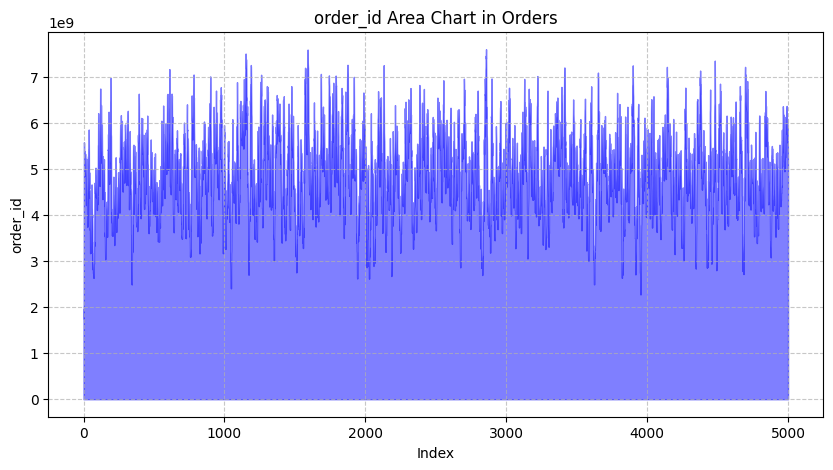

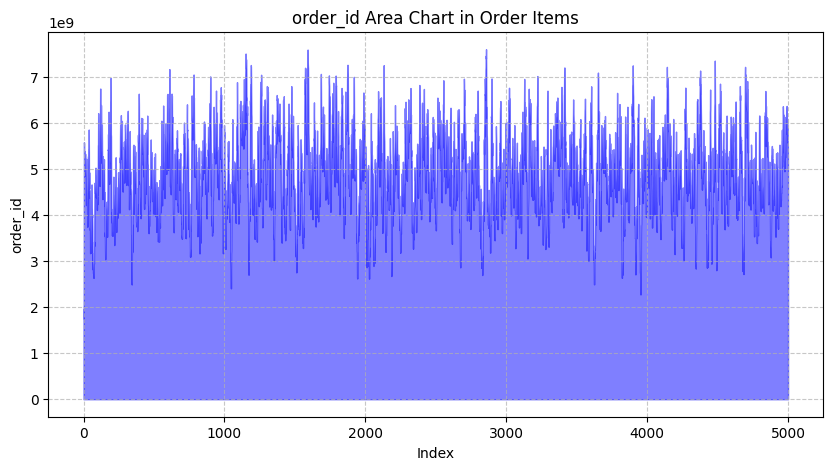

In [39]:
for name, df in dataset.items():
    num_cols = df.select_dtypes(include=['number']).columns
    if len(num_cols) > 0:
        col = num_cols[0]
        plt.figure(figsize=(10, 5))

        graph = df[col].dropna().rolling(window=10, min_periods=1).mean()
        plt.fill_between(graph.index, graph, color="blue", alpha=0.5)

        plt.title(f"{col} Area Chart in {name}")
        plt.xlabel("Index")
        plt.ylabel(col)
        plt.grid(True, linestyle="--", alpha=0.7)  # Add grid for readability
        plt.show()

# BAR CHART

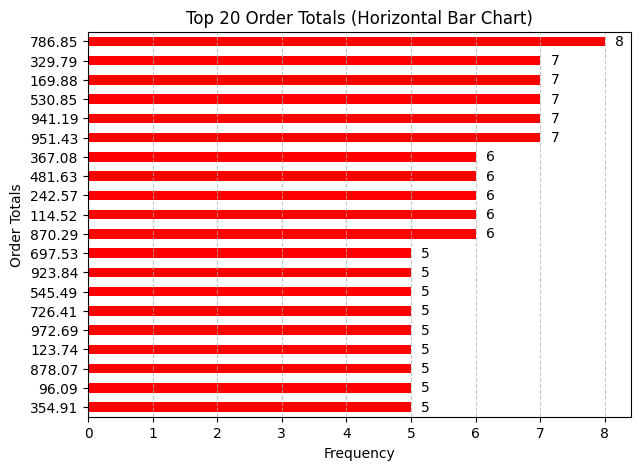

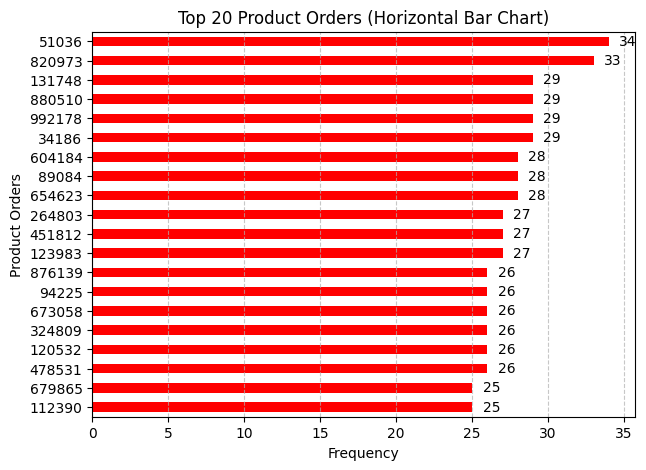

In [26]:

for name, df in dataset.items():
    num_cols = df.select_dtypes(include=['number']).columns
    columns_to_plot = {}
    if name == "Order Items":
        columns_to_plot["Product Orders"] = df["product_id"]
    elif name == "Orders":
        columns_to_plot["Order Totals"] = df["order_total"]

    for title, col_data in columns_to_plot.items():
     plt.figure(figsize=(7, 5))
     value_counts = col_data.value_counts().nlargest(20)

     ax = value_counts.plot(kind="barh", color="red")
     plt.title(f"Top {len(value_counts)} {title} (Horizontal Bar Chart)")
     plt.xlabel("Frequency")
     plt.ylabel(title)

     plt.gca().invert_yaxis()

     for i, v in enumerate(value_counts):
        ax.text(v + 0.02 * max(value_counts), i, str(v), color="black", fontsize=10, verticalalignment="center")

     plt.grid(axis="x", linestyle="--", alpha=0.7)

     plt.show()



# LINE CHART

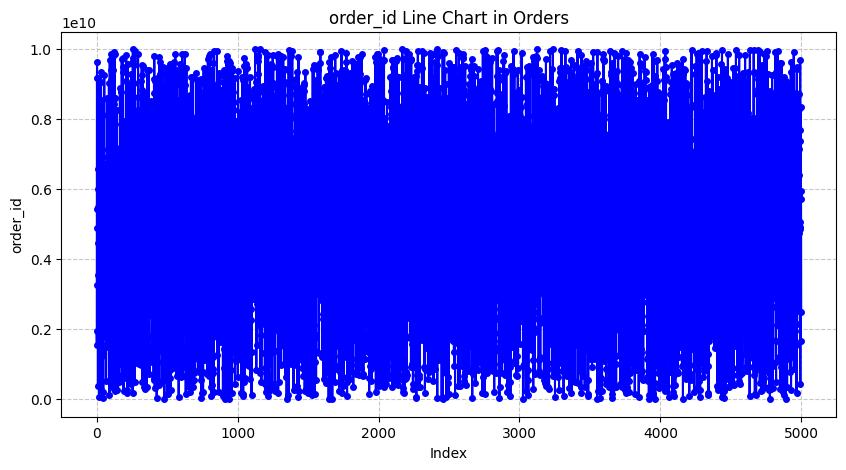

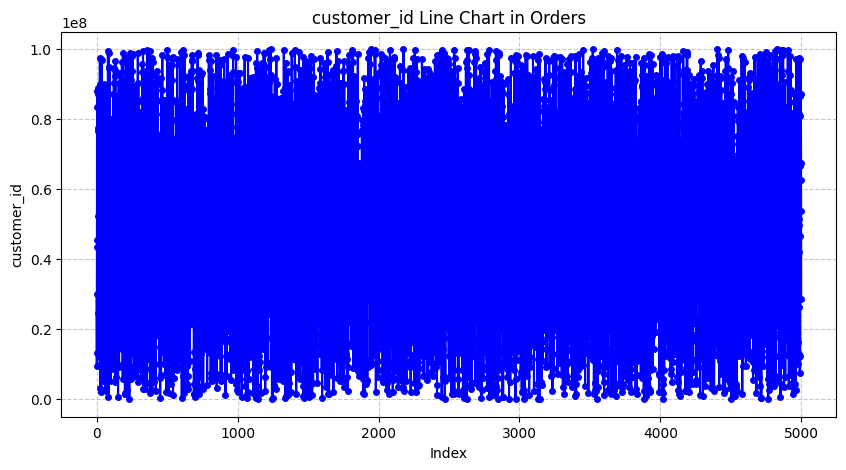

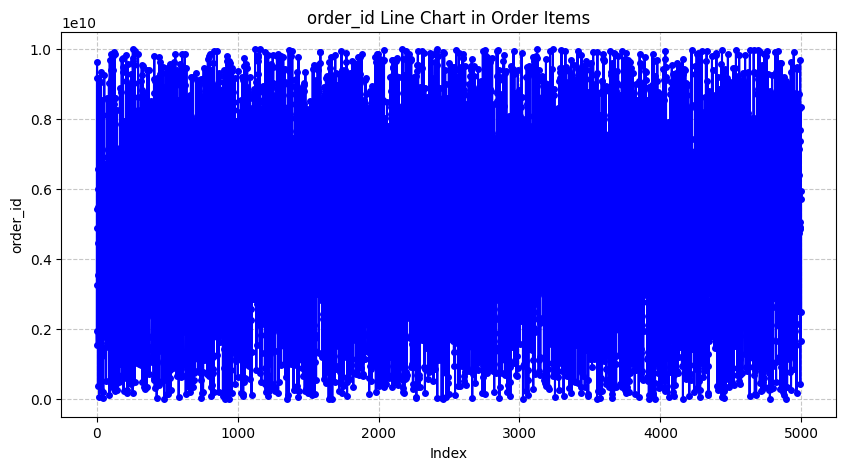

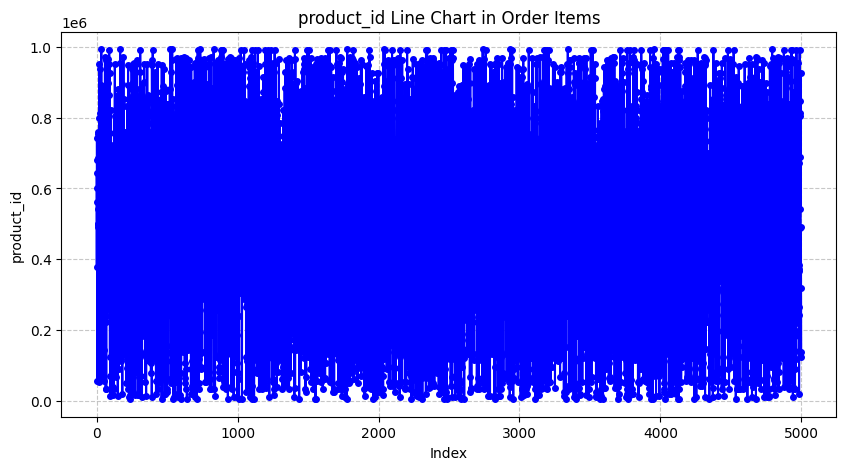

In [35]:
for name, df in dataset.items():
    num_cols = df.select_dtypes(include=['number']).columns
    cols = num_cols[:2]

    for col in cols:
        plt.figure(figsize=(10, 5))  # Larger figure for better readability

        df[col].dropna().reset_index(drop=True).plot(kind="line", color="blue", linestyle="-", marker="o", markersize=4)
        plt.title(f"{col} Line Chart in {name}")
        plt.xlabel("Index")
        plt.ylabel(col)
        plt.grid(True, linestyle="--", alpha=0.7)  # Add grid for better readability
        plt.show()


# PIE CHART

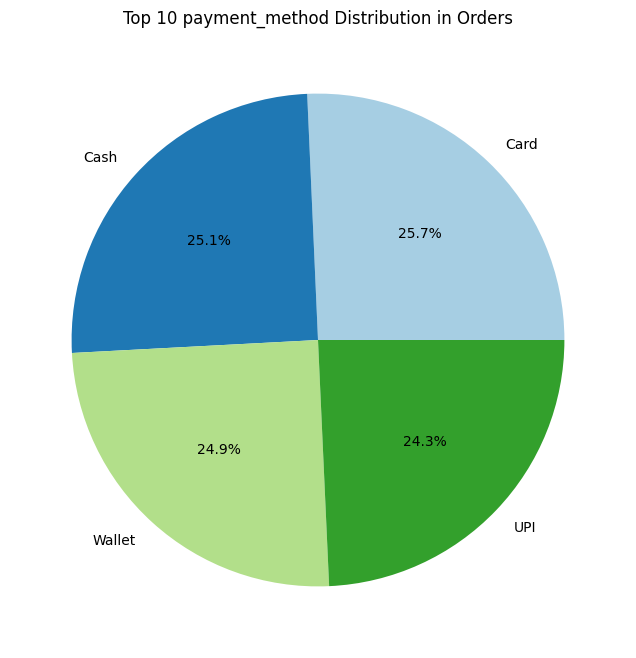

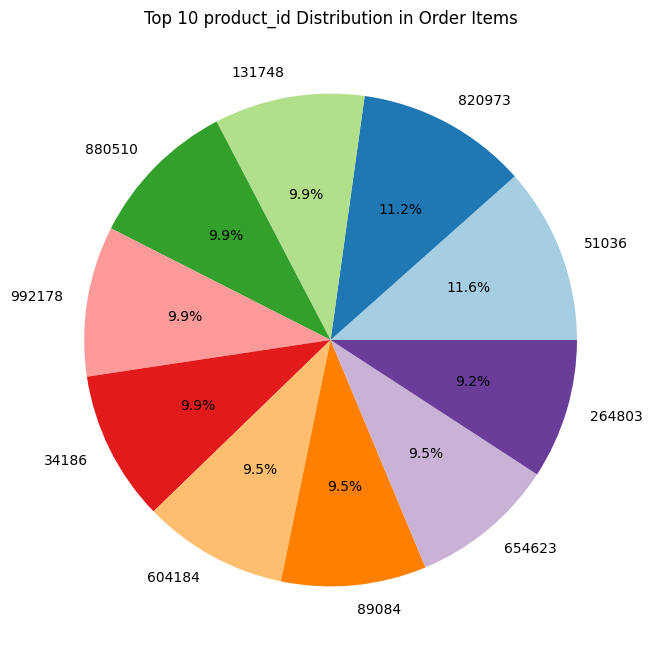

In [43]:
columns_to_plot = {
    "Orders": "payment_method",
    "Order Items": "product_id"
}

for name, col in columns_to_plot.items():
    if col in dataset[name].columns:
        plt.figure(figsize=(8, 8))

        value_counts = dataset[name][col].value_counts().nlargest(10)


        plt.pie(value_counts, labels=value_counts.index, autopct="%1.1f%%", colors=plt.cm.Paired.colors)
        plt.title(f"Top 10 {col} Distribution in {name}")

        plt.show()